<a href="https://colab.research.google.com/github/JGH94/python_Pat_Name/blob/main/python_Pat_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,871 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings 
from matplotlib import font_manager, rc 

In [7]:
Pat_Data_1 = pd.read_excel('/content/sample_data/2020_Pat_Name.xlsx'  ,names = ['Pat_Name','Count_a'] ) 
 
Pat_Data_2 = pd.read_csv('/content/sample_data/2020_Pat_Name_Dong.csv',names = ['Pat_Name','Count_b','Date']  ,encoding='cp949') 
 
Pat_Data_3 = pd.read_csv('/content/sample_data/2020_Pat_Name_Song.csv',names = ['Pat_Name','Count_c'] , encoding='cp949')
 
Pat_Data_4 = pd.read_csv('/content/sample_data/2020_Pat_Name_Yang.csv',names =  ['Pat_Name','Count_d','Date'] ,encoding='cp949') 

print(Pat_Data_1.count())
print(Pat_Data_1.dtypes) 
print('-------------------------------')
print(Pat_Data_2.count())
print(Pat_Data_2.dtypes)
print('-------------------------------')
print(Pat_Data_3.count())
print(Pat_Data_3.dtypes)
print('-------------------------------')
print(Pat_Data_4.count())
print(Pat_Data_4.dtypes)

Pat_Name    1353
Count_a     1353
dtype: int64
Pat_Name    object
Count_a      int64
dtype: object
-------------------------------
Pat_Name    4870
Count_b     4870
Date        4870
dtype: int64
Pat_Name    object
Count_b      int64
Date        object
dtype: object
-------------------------------
Pat_Name    6527
Count_c     6527
dtype: int64
Pat_Name    object
Count_c      int64
dtype: object
-------------------------------
Pat_Name    5074
Count_d     5073
Date        5074
dtype: int64
Pat_Name     object
Count_d     float64
Date         object
dtype: object


In [8]:
# 데이터 이름마다의 지역에서 사용하는 개수 데이터 병합 및 null은 0 처리
list_1 = pd.merge(left=Pat_Data_3, right=Pat_Data_1, how='left', on=['Pat_Name'], sort=False)
list_2 = pd.merge(list_1, right=Pat_Data_4, how='left', on=['Pat_Name'], sort=False)
R_list =  pd.merge(list_2, right=Pat_Data_2, how='left', on=['Pat_Name'], sort=False).drop(['Date_x', 'Date_y'], axis=1).fillna(0)
# SumCount는 총합!
R_list['SumCount'] = R_list['Count_a']+R_list['Count_b']+R_list['Count_c']+R_list['Count_d']
print(R_list.count()) 

Pat_Name    6854
Count_c     6854
Count_a     6854
Count_d     6854
Count_b     6854
SumCount    6854
dtype: int64


In [9]:
list_Count_R = R_list['SumCount'] >= 10
list_Pat_Name_Sum = R_list[list_Count_R]
list_Pat_Name_Sum.set_index('Pat_Name', inplace=True)
print(list_Pat_Name_Sum.sort_values(by='SumCount', ascending=False)[:20])
print('---------------------------------------------------------------------------') 
print(list_Pat_Name_Sum.sort_values(by='SumCount', ascending=True)[:20])

          Count_c  Count_a  Count_d  Count_b  SumCount
Pat_Name                                              
코코            485     19.0    484.0    291.0    1279.0
초코            349     12.0    370.0    220.0     951.0
보리            346      0.0    364.0    237.0     947.0
해피            193      8.0    264.0    161.0     626.0
몽이            207     10.0    206.0    118.0     541.0
두부            186     16.0    196.0    135.0     533.0
똘이            194      4.0    208.0    111.0     517.0
콩이            290     21.0      0.0    200.0     511.0
토리            175     25.0    199.0    104.0     503.0
뭉치            174     14.0    201.0     93.0     482.0
쿠키            167     16.0    156.0     82.0     421.0
까미            232     10.0      0.0    137.0     379.0
토토            156      6.0    132.0     74.0     368.0
별             135     16.0    113.0     86.0     350.0
아리            130      5.0    113.0     92.0     340.0
별이            179     11.0      0.0    147.0     337.0
사랑이       

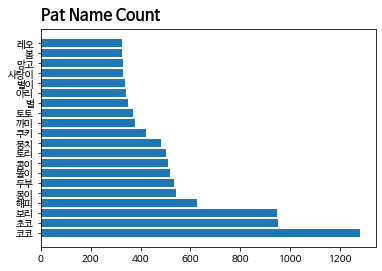

In [14]:
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
# Data 시각화 상위 20개
df_R_D = list_Pat_Name_Sum.sort_values(by='SumCount', ascending=False)[:20]
df_R_A = list_Pat_Name_Sum.sort_values(by='SumCount', ascending=True)[:20] 
X_ = []
Y_ = [] 
x_ = np.arange(20)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}

for i in range(0,df_R_D['SumCount'].count()):
  X_.append(df_R_D['SumCount'].index[i])
  Y_.append(df_R_D['SumCount'][i])  
plt.rc('font', family='NanumBarunGothic')
plt.barh(x_, Y_, height = 0.8)   
plt.title('Pat Name Count', fontdict=title_font, loc='left', pad=10)
plt.yticks(x_, X_)
plt.show()

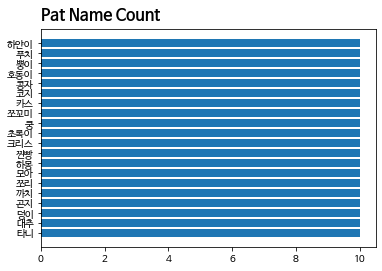

In [15]:
# 10개 이상 데이터 하위 20개 조회
X_ = []
Y_ = [] 
x_ = np.arange(20)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}

for i in range(0,df_R_A['SumCount'].count()):
  X_.append(df_R_A['SumCount'].index[i])
  Y_.append(df_R_A['SumCount'][i])  
plt.rc('font', family='NanumBarunGothic')
plt.barh(x_, Y_, height = 0.8)   
plt.title('Pat Name Count', fontdict=title_font, loc='left', pad=10)
plt.yticks(x_, X_)
plt.show()